<a href="https://colab.research.google.com/github/yuzhangskye/info5731/blob/master/Zhang_Selfstudy_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHAPTER 5

In [0]:
num_friends=[100,49,89,99,41,40,67,89,89,89,34,78,25,0,0,0,23,12,34,0,0,0,0,0,0,0,23,12,11,5,3,0,0,0]

In [0]:
from collections import Counter

In [0]:
friend_counts=Counter(num_friends)

In [0]:
xs=range(101)

In [0]:
ys=[friend_counts[x] for x in xs]

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, '# of people')

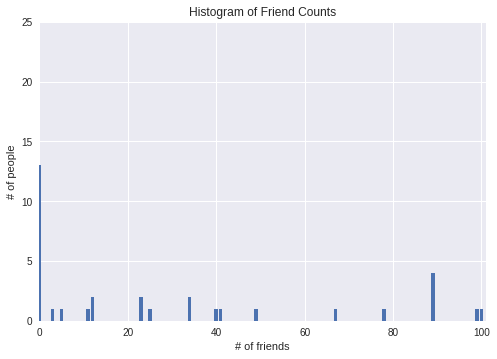

In [34]:
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")

In [0]:
num_points = len(num_friends)

In [0]:
largest_value=max(num_friends)
smallest_value=min(num_friends)

In [0]:
sorted_values=sorted(num_friends)
smallest_value=sorted_values[0]
second_smallest_value=sorted_values[1]
second_largest_value=sorted_values[-2]

In [0]:
def mean(x):
  return sum(x)/len(x)

In [39]:
mean(num_friends)

29.764705882352942

In [0]:
def median(v):
  n=len(v)
  sorted_v=sorted(v)
  midpoint=n//2
  if n%2 ==1:
    return sorted_v[midpoint]
  else:
    lo=midpoint-1
    hi=midpoint
    return (sorted_v[lo+sorted_v[hi]])/2

In [51]:
median(num_friends)

44.5

In [0]:
def quantile(x,p):
  p_index=int(p*len(x))
  return sorted(x)[p_index]

In [53]:
quantile(num_friends, 0.10)
quantile(num_friends, 0.25)
quantile(num_friends, 0.75)
quantile(num_friends, 0.90)

89

In [0]:
def mode(x):
  counts=Counter(x)
  max_count=max(counts.values())
  return [x_i for x_i, count in counts.iteritems()
         if count == max_count]

In [55]:
mode(num_friends)

AttributeError: ignored

In [56]:
def data_range(x):
  return max(x) - min(x)
data_range(num_friends)

100

In [0]:
def de_mean(x):
  x_bar=mean(x)
  return [x_i -x_bar for x_i in x]

In [0]:
import math

In [0]:
def variance(x):
  n=len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n-1)

In [66]:
variance(num_friends)

AttributeError: ignored

In [0]:
def standard_deviation(x):
  return math.sqrt(variance(x))

In [68]:
strandard_deviation(num_friends)

NameError: ignored

In [0]:
def interquartile_range(x):
  return quantile(x, 0.75) - quantile(x, 0.25)

In [70]:
interquartile_range(num_friends)

49

In [0]:
def covariance(x,y):
  n=len(x)
  return dot(de_mean(x), de_mean(y))/(n-1)

In [72]:
covariance(num_friends,daily_minutes)

NameError: ignored

In [0]:
outlier=num_friends.index(100)

In [0]:
num_friends_good=[x
                 for i,x in enumerate(num_friends)
                 if i != outlier]

In [75]:
daily_minutes_good=[x
                   for i,x in enumerate(daily_minutes)
                   if i!=outlier]

NameError: ignored

In [76]:
coorelation(num_friends_good,daily_minutes_good)

NameError: ignored

CHAPTER 6

In [0]:
def random_kid():
  return random.choice(["boy","girl"])

In [0]:
both_girls=0
older_girl=0
either_girl=0

In [0]:
import random
random.seed(0)
for  _ in range(10000):
  younger=random_kid()
  older=random_kid()
  if older=="girl":
    older_girl +=1
  if older =="girl" and younger =="girl":
    both_girls+=1
  if older == "girl" or younger =="girl":
    either_girl +=1
  print("P(both | older):", both_girls/older_girl)
  print("P(both | either):", both_girls/either_girl)

In [0]:
def uniform_pdf(x):
  return 1 if x>=0 and x<1 else 0

In [0]:
def uniform_cdf(x):
  if x< 0: return 0
  elif x<1: return x
  else: return 1

In [0]:
def normal_pdf(x, mu=0, sigma=1):
  sqrt_two_pi = math.sqrt(2*math.pi)
  return(math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

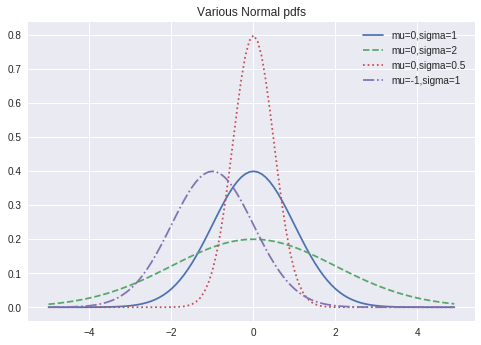

In [99]:
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [0]:
def normal_cdf(x,mu=0,sigma=1):
  return(1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2

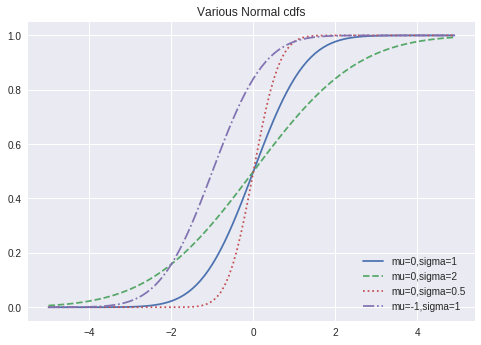

In [101]:
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [0]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
  if mu!=0 or sigma!=1:
    return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
  low_z=-10.0
  hi_z=10.0
  while hi_z - low_z>tolerance:
    mid_z=(low_z+hi_z/2)
    mid_p=normal_cdf(mid_Z)
    if mid_p<p:
      hi_z=mid_z
    elif mid_p>p:
      hi_z=mid_z
    else:
      break
  return mid_z

In [0]:
def bernoulli_trial(p):
  return 1 if random.random()<p else 0

In [0]:
def binomial(n,p):
  return sum(bernoulli_trial(p) for _ in range(n))

In [0]:
def make_hist(p,n,num_points):
  data=[binomial(n,p) for _ in range(num_points)]
  histogram=Counter(data)
  plt.bar([x-0.4 for x in histogram.keys()],
         [v/num_points for v in histogram.values()],
         0.8,
         color='0.75')
  mu=p*n
  sigma=math.sqrt(n*p*(1-p))
  xs=range(min(data),max(data) + 1)
  ys=[normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
     for i in xs]
  plt.plot(xs,ys)
  plt.title("Binomial Distribution vs. Normal Approximation")
  plt.show()

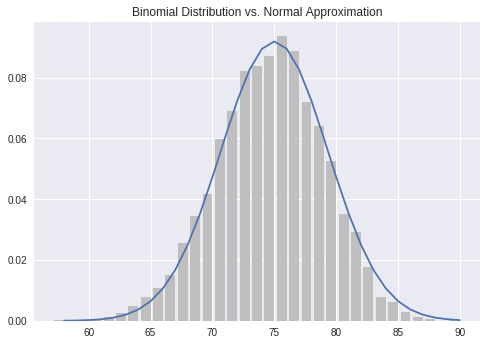

In [113]:
make_hist(0.75,100,10000)

CHAPTER 7

In [0]:
import math

In [0]:
def normal_approximation_to_binomial(n,p):
  mu=p*n
  sigma=math,math.sqrt(p*(1-p)*n)
  return mu,sigma

In [0]:
normal_probability_below=normal_cdf

In [0]:
def normal_probability_above(lo,mu=0,sigma=1):
  return 1-normal_cdf(lo,mu,sigma)

In [0]:
def normal_probability_between(lo,hi,mu=0,sigma=1):
  return normal_cdf(hi,mu,sigma)-normal_cdf(lo,mu,sigma)

In [0]:
def normal_probability_outside(lo,hi,mu=0,sigma=1):
  return 1-normal_probability_between(lo,hi,mu,sigma)

In [0]:
def normal_upper_bound(probability, mu=0,sigma=1):
  return inverse_normal_cdf(probability,mu,sigma)

In [0]:
def normal_lower_bound(probability, mu=0,sigma=1):
  return inverse_normal_cdf(1-probability,mu,sigma)

In [0]:
def normal_two_sided_bounds(probability, mu=0,sigma=1):
  tail_probability=(1-probability)/2
  upper_bound=normal_lower_bound(tail_probability,mu,sigma)
  lower_bound=normal_upper_bound(tail_probability,mu,sigma)
  return lower_bound, upper_bound

In [0]:
mu_0,sigma_0=normal_approximation_to_binomial(1000,0.5)

In [134]:
normal_two_sided_bounds(0.95,mu_0,sigma_0)

NameError: ignored

In [0]:
def two_sided_p_value(x,mu=0,sigma=1):
  if x>=mu:
    return 2*normal_probability_above(x,mu,sigma)
  else:
    return 2*normal_probability_below(x,mu,sigma)

In [139]:
two_sided_p_value(529.5,mu_0,sigma_0)

TypeError: ignored

In [141]:
import random
extreme_value_count=0
for _ in range(1000):
  num_heads=sum(1 if random.random()<0.5 else 0
               for _ in range(1000))
  if num_heads>=530 or num_heads<=470:
    extreme_value_count+=1
print(extreme_value_count/100000)

0.00067


In [142]:
two_sided_p_value(531.5, mu_0, sigma_0)

TypeError: ignored

In [0]:
upper_p_value=normal_probability_above
lower_p_value=normal_probability_below

In [144]:
upper_p_value(524.5,mu_0,sigma_0)

TypeError: ignored

In [146]:
p=0.525
import math
math.sqrt(p*(1-p)/1000)
p_hat=525/1000
mu=p_hat
sigma=math.sqrt(p_hat*(1-p_hat)/1000)
normal_two_sided_bounds(0.95,mu,sigma)

NameError: ignored

In [0]:
def run_experiment():
  return[random.random()<0.5 for _ in range(1000)]

In [0]:
def reject_fairness(experiment):
  num_heads=len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads >531

In [149]:
random.seed(0)
experiments=[run_experiment() for _ in range(1000)]
num_rejections=len([experiment
                   for experiment in experiments
                   if reject_fairness(experiment)])
print(num_rejections)

46


In [0]:
def estimated_parameters(N,n):
  p=n/N
  sigma=math.sqrt(p*(1-p)/N)
  return p,sigma

In [0]:
def a_b_test_statistic(N_A,n_A,N_B,n_B):
  p_A,sigma_A=estimated_parameters(N_A,n_A)
  p_B,sigma_B=estimated_parameters(N_B,n_B)
  return(p_B-p_A)/math.sqrt(sigma_A**2+sigma_B**2)

In [0]:
z=a_b_test_statistic(1000,200,1000,180)

In [156]:
two_sided_p_value(z)

0.254141976542236

In [157]:
z=a_b_test_statistic(1000,200,1000,150)
two_sided_p_value(z)

0.003189699706216853

In [0]:
def B(alpha,beta):
  return math.gamma(alpha)*math.gamma(beta)/math.gamma(alpha+beta)

In [0]:
def beta_pdf(x,alpha,beta):
  if x<= 0 or x>=1:
    return 0
  return x**(alpha-1)*(1-x)**(beta-1)/B(alpha,beta)